<h1> Principal Component Analysis </h1>

<h2>Objectives </h2>
    <ul>
      <li>When and How to use PCA</li> 
      <li>Using SKlearning PCA step by step</li> 
    </ul>

PCA is a method to reduce the dimensionality of a dataset.
PCA combines highly correlated variables into a new, smaller set of constructs called pricipal components, which capture most of the variance present in the data.

PCA won't be effective with categorical variables since thay lack a variance structure
PCA can tell us which variable is the most valuable for clustering the data

PCA finds the vector w of weights 
algorithm proceeds by first finding the component having maximal variance.
the second component found is uncorrelated with the first and has the second-highest variance, and so on.
the final result is an eigendecomposition of the covariance matrix of X, where the first principal component is the eigenvector corresponding to the largest eigenvalue and the second principal component corresponds to the eigenvector with the second largest eigenvalue.
PC1 line is a linear combination of variables

Heatmaps 
t-SNE plots
Multi-Dimensional Scaling

<h2>Table of Content </h2>
    <ul>
      <li></li> 
      <li></li> 
    </ul>

<h2> Step 1: Import Libraries </h2>

In [141]:
from scipy.io import arff # load aeff file
import pandas as pd
from sklearn.model_selection import train_test_split as tts # train test method

<h2> Step 2: Load The Data </h2>
<p> We are using a dataset
<a href="https://www.openml.org/search?type=data&sort=runs&id=554&status=active">dataset</a>
from The MNIST database of handwritten digit. <br> It has 784 feature columns and a training set of 60000 examples
and a test set of 10000 examples</p>

In [142]:
mnist = arff.loadarff('/Users/chriz_yu/Documents/Datasets/mnist_784.arff') 
df = pd.DataFrame(mnist[0]) # First element in arff is the dataset
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'5'
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'4'
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9'


In [143]:
target = df['class'] # the labels (the integers 0-9)
target = target.astype(str).str.replace('\D+','',regex=True).astype(int) # del b'' and convert to int
data = df.iloc[:,0:784] # 70000 images with 784 dimensions

<h2> Step 3: Split Data Into Training And Testing Set</h2>

In [144]:
train_img, test_img, train_lbl, test_lbl = tts(data, target, train_size = 0.7, random_state=77)

<h2> Step 4: Standardize The Data</h2>

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(train_img)

# Apply transform to both training and testing
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

<h2> Step 5: Apply PCA</h2>

In [146]:
from sklearn.decomposition import PCA

# scikit-learn chooses the minimum number of principal components 
# such that 95 percent of the variance is retained
pca = PCA(0.95)
pca.fit(train_img)

# PCA projection to 2D
pca2 = PCA(n_components=2)
PC = pca2.fit_transform(train_img)

In [147]:
print(f"95 percent of the variance amounts to {pca.n_components_} principal components")

95 percent of the variance amounts to 325 principal components


In [148]:
# Apply the transform to the training and testing
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

<h2> Step 6: Apply Logistic Regression to the Transformed Data</h2>

In [149]:
from sklearn.linear_model import  LogisticRegression

In [150]:
LogR = LogisticRegression()
LogR.fit(train_img,train_lbl)

/Users/chriz_yu/opt/anaconda3/envs/PythonDSE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h2> Step 7: Measuring Model Performance</h2>

In [151]:
LogR.score(test_img,test_lbl)

0.922

In [152]:
PCDF = pd.DataFrame(data = PC, columns = ['PC1','PC2'])
PCDF['class'] = train_lbl.sort_index().reset_index(drop=True)
PCDF

,PC1,PC2,class
0,-3.680937,2.190330,5
1,18.395050,-2.137186,0
2,-0.764876,3.170962,1
3,9.145649,4.311930,9
4,1.706641,6.299126,2
...,...,...,...
48995,-0.284282,5.800556,0
48996,-7.170778,-0.807182,2
48997,-4.045385,-1.593397,3
48998,-6.945290,3.438372,4


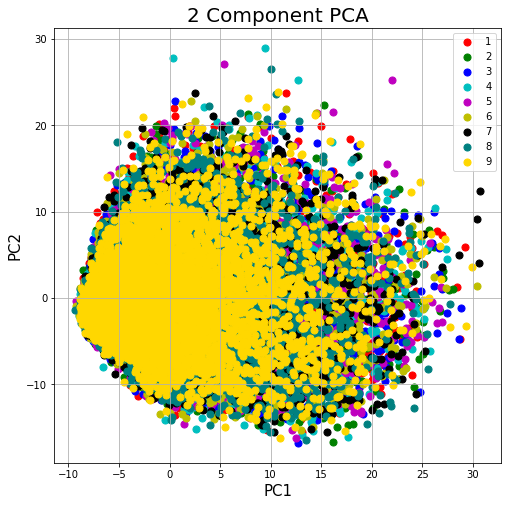

In [153]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [1,2,3,4,5,6,7,8,9]
colors = ['r','g','b','c','m','y','k','teal','gold']
for t, color in zip(targets, colors):
    indicesToKeep = PCDF['class'] == t
    ax.scatter(PCDF.loc[indicesToKeep, 'PC1'], PCDF.loc[indicesToKeep, 'PC2'], c = color, s = 50)

ax.legend(targets)
ax.grid()

